In [ ]:
# Here we will apply T-sne dimension reduction techniques 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd            # For data handling and analysis
import re                      # For regex text cleaning
from nltk.corpus import stopwords  # For stop words removal
import fuzzywuzzy              # For fuzzy string matching
import distance                # For string similarity measures
import numpy as np             # For numerical operations
from fuzzywuzzy import fuzz    # For specific fuzzy matching functions
from distance import lcsubstrings # For longest common substrings
from nltk.stem import PorterStemmer # For stemming words
from bs4 import BeautifulSoup  # For cleaning HTML tags from text
import os
from os import path
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced plotting
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

# Load the cleaned dataset
df = pd.read_csv("quora_cleaned_train_final.csv")


In [2]:
"""Step 1: Sample 5000 rows to keep it efficient.

Step 2: Scale features so t-SNE treats them fairly.

Step 3: Save labels for later plotting."""
dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [3]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.000s...
[t-SNE] Computed neighbors for 5000 samples in 0.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.149230
[t-SNE] Computed conditional probabilities in 0.119s
[t-SNE] Iteration 50: error = 85.7687378, gradient norm = 0.0870877 (50 iterations in 1.471s)
[t-SNE] Iteration 100: error = 71.2147522, gradient norm = 0.0137495 (50 iterations in 1.123s)
[t-SNE] Iteration 150: error = 69.3580627, gradient norm = 0.0074868 (50 iterations in 1.053s)
[t-SNE] Iteration 200: error = 68.5980911, gradient norm = 0.0052904 (50 iterations in 1.004s)
[t-SNE] Iteration 250: error = 68.1645050, gradient norm = 0.0041461

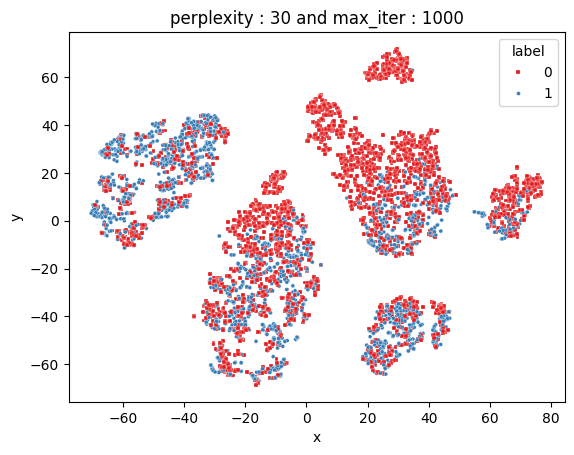

In [5]:
df = pd.DataFrame({'x': tsne2d[:,0], 'y': tsne2d[:,1], 'label': y})

# scatterplot fix
sns.scatterplot(data=df, x='x', y='y', hue='label', s=8, palette="Set1", style="label", markers=['s','o'])

plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()



In [6]:
# 3-d visulization

tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.000s...
[t-SNE] Computed neighbors for 5000 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.149230
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 86.3963699, gradient norm = 0.0778431 (50 iterations in 4.495s)
[t-SNE] Iteration 100: error = 70.0513458, gradient norm = 0.0068744 (50 iterations in 2.708s)
[t-SNE] Iteration 150: error = 68.6601791, gradient norm = 0.0036415 (50 iterations in 2.188s)
[t-SNE] Iteration 200: error = 68.1403885, gradient norm = 0.0024299 (50 iterations in 2.169s)
[t-SNE] Iteration 250: error = 67.8332443, gradient norm = 0.0018659

In [17]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')